# Importing the libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

# Data collection & processing

In [28]:
advertising=pd.read_csv("advertising.csv")

In [31]:
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [32]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [33]:
advertising.shape

(200, 4)

In [34]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [35]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [36]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# Handling missing values

In [37]:
#checking null values
advertising.isnull().sum()*100/advertising.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

# Data visualization

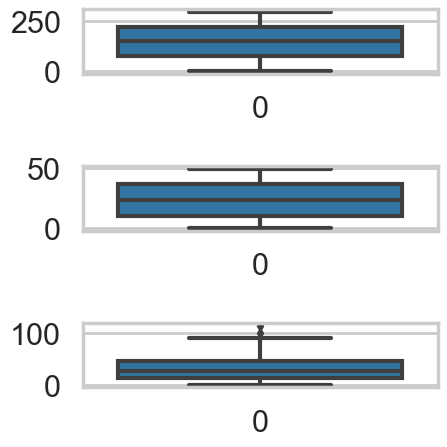

In [38]:
fig, axs=plt.subplots(3, figsize=(5,5))
plt1=sns.boxplot(advertising['TV'], ax=axs[0])
plt2=sns.boxplot(advertising['Radio'], ax=axs[1])
plt3=sns.boxplot(advertising['Newspaper'], ax=axs[2])
plt.tight_layout()

In [39]:
advertising["Radio"]

0      37.8
1      39.3
2      45.9
3      41.3
4      10.8
       ... 
195     3.7
196     4.9
197     9.3
198    42.0
199     8.6
Name: Radio, Length: 200, dtype: float64

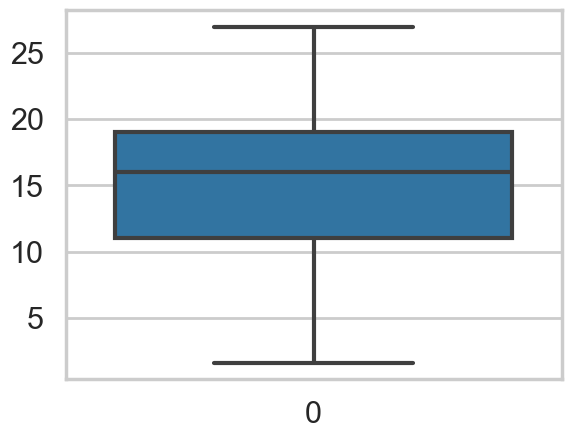

In [40]:
sns.boxplot(advertising["Sales"])
plt.show()

In [41]:
mask = np.zeros_like(advertising.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(advertising.corr(), mask=mask, cmap=cmap, vmax=.9, square=True, linewidths=.5, ax=ax)

C:\Users\Hanu\AppData\Local\Temp\ipykernel_2692\2417052634.py:1: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  mask = np.zeros_like(advertising.corr(), dtype=np.bool)


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [ ]:
f, ax = plt.subplots(figsize=(11, 9))
plt.scatter(advertising["TV"], advertising["Sales"])
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("Sales vs TV")

f, ax = plt.subplots(figsize=(11, 9))
plt.scatter(advertising["Radio"], advertising["Sales"])
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.title("Sales vs Radio")

f, ax = plt.subplots(figsize=(11, 9))
plt.scatter(advertising["Newspaper"], advertising["Sales"])
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.title("Sales vs Radio")

In [ ]:
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot=True)
plt.show()

# Prep the Data for Modelling

In [42]:
X = advertising.drop('Sales',axis=1) 
Y = advertising['Sales'] 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42) 

In [43]:
x = advertising.drop("Sales", axis = 1)
y = advertising["Sales"]

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 42)

print("x_train size:", x_train.shape)
print("y_train size:", y_train.shape)
print("\nx_test size:", x_test.shape)
print("y_test size:", y_test.shape)

x_train size: (150, 3)
y_train size: (150,)

x_test size: (50, 3)
y_test size: (50,)


In [45]:
df_results = pd.DataFrame(columns = ["Predictor/s", "R2", "MAE", "MSE", "RMSE", "Cross-Val Mean"])

# Linear Regression

In [46]:
def linreg_model(xtrain, xtest):
    linreg = LinearRegression()

    linreg.fit(xtrain, y_train)
    
    y_pred = linreg.predict(xtest)
    
    print("R2:", r2_score(y_pred, y_test))
    print("MAE:", mean_absolute_error(y_pred, y_test))
    print("MSE:", mean_squared_error(y_pred, y_test))
    print("RMSE:", np.sqrt(mean_squared_error(y_pred, y_test)))
    
    f, ax = plt.subplots(figsize=(11, 9))
    plt.scatter(y_pred, y_test)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Actual vs Predicted")
    
    return {"R2": r2_score(y_pred, y_test) * 100, "MAE": mean_absolute_error(y_pred, y_test), 
            "MSE": mean_squared_error(y_pred, y_test), "RMSE": np.sqrt(mean_squared_error(y_pred, y_test))}

R2: 0.90514835876105
MAE: 1.1199940713361771
MSE: 2.404067444711888
RMSE: 1.5505055448826643
Cross-Val Results: [0.89391193 0.84835255 0.91336339 0.93740449 0.90972209 0.92995146
 0.85494586 0.83727721 0.86267846 0.927566  ]
Cross-Val Mean: 0.8915173447734139


C:\Users\Hanu\AppData\Local\Temp\ipykernel_2692\1263214137.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(linreg_all_results, ignore_index=True)


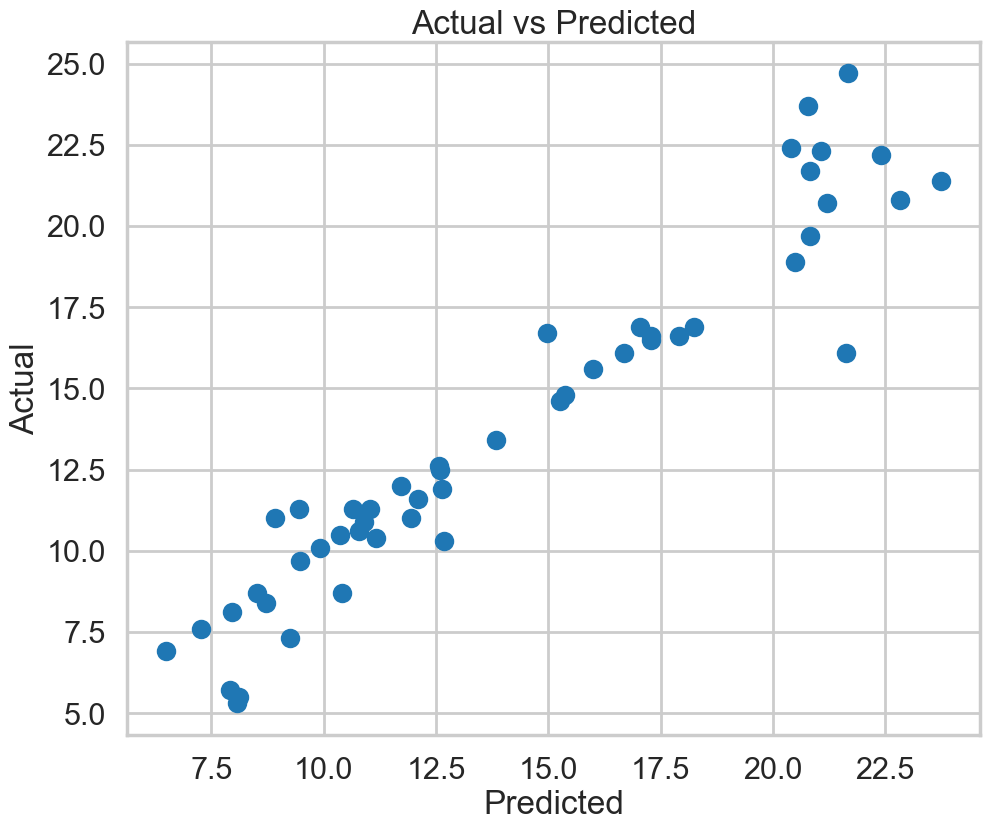

In [47]:
linreg_all_results = linreg_model(x_train, x_test)

cv_score = cross_val_score(LinearRegression(), x, y, cv=10)

print("Cross-Val Results:", cv_score)
print("Cross-Val Mean:", cv_score.mean())

linreg_all_results.update({"Predictor/s":"All", "Cross-Val Mean": cv_score.mean() * 100})

df_results = df_results.append(linreg_all_results, ignore_index=True)

# Using all predictors

R2: 0.7550093961233676
MAE: 1.8651146911099161
MSE: 5.513351187165511
RMSE: 2.3480526372220685
Cross-Val Results: [0.83283252 0.72444029 0.77846467 0.87955404 0.76065371 0.88067487
 0.83508629 0.66102314 0.73611831 0.83119639]
Cross-Val Mean: 0.7920044239035755


C:\Users\Hanu\AppData\Local\Temp\ipykernel_2692\1891683173.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(linreg_TV_results, ignore_index=True)


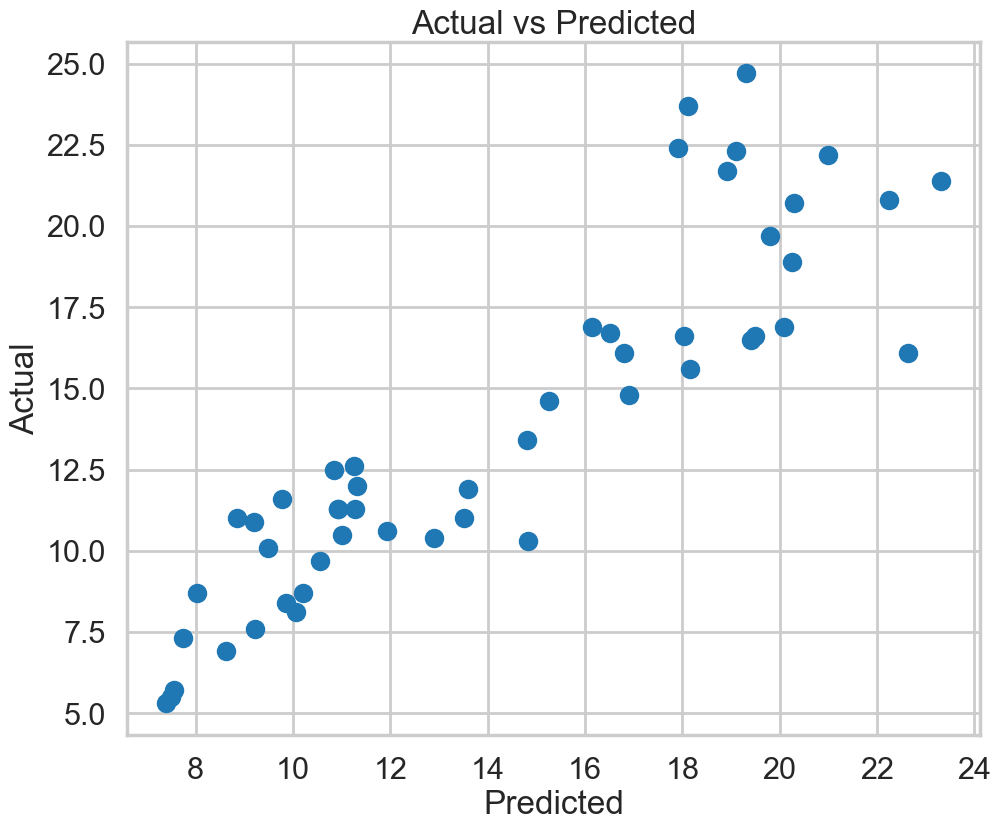

In [48]:
linreg_TV_results = linreg_model(x_train["TV"].values.reshape(-1,1), x_test["TV"].values.reshape(-1,1))

cv_score = cross_val_score(LinearRegression(), x["TV"].values.reshape(-1, 1), y, cv=10)

print("Cross-Val Results:", cv_score)
print("Cross-Val Mean:", cv_score.mean())

linreg_TV_results.update({"Predictor/s":"TV", "Cross-Val Mean": cv_score.mean() * 100})

df_results = df_results.append(linreg_TV_results, ignore_index=True)

# Using only TV as predictor

R2: 0.7550093961233676
MAE: 1.8651146911099161
MSE: 5.513351187165511
RMSE: 2.3480526372220685
Cross-Val Results: [0.83283252 0.72444029 0.77846467 0.87955404 0.76065371 0.88067487
 0.83508629 0.66102314 0.73611831 0.83119639]
Cross-Val Mean: 0.7920044239035755


C:\Users\Hanu\AppData\Local\Temp\ipykernel_2692\1891683173.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(linreg_TV_results, ignore_index=True)


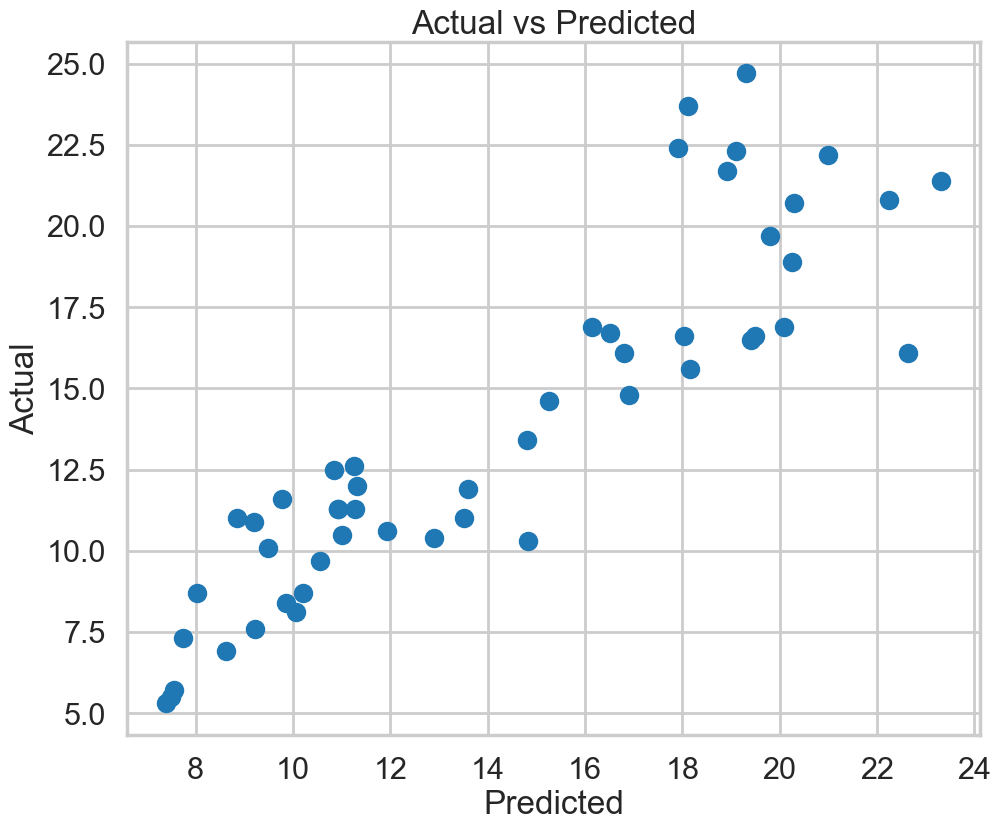

In [49]:
linreg_TV_results = linreg_model(x_train["TV"].values.reshape(-1,1), x_test["TV"].values.reshape(-1,1))

cv_score = cross_val_score(LinearRegression(), x["TV"].values.reshape(-1, 1), y, cv=10)

print("Cross-Val Results:", cv_score)
print("Cross-Val Mean:", cv_score.mean())

linreg_TV_results.update({"Predictor/s":"TV", "Cross-Val Mean": cv_score.mean() * 100})

df_results = df_results.append(linreg_TV_results, ignore_index=True)

# Using TV and Radio as predictors

R2: 0.9065132059179849
MAE: 1.11445714938499
MSE: 2.356396290987085
RMSE: 1.5350557940957992
Cross-Val Results: [0.89398144 0.84855767 0.91492421 0.93757095 0.91060097 0.93060159
 0.85490051 0.83752431 0.86285024 0.92852052]
Cross-Val Mean: 0.8920032415598959


C:\Users\Hanu\AppData\Local\Temp\ipykernel_2692\2369682549.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(linreg_TVR_results, ignore_index=True)


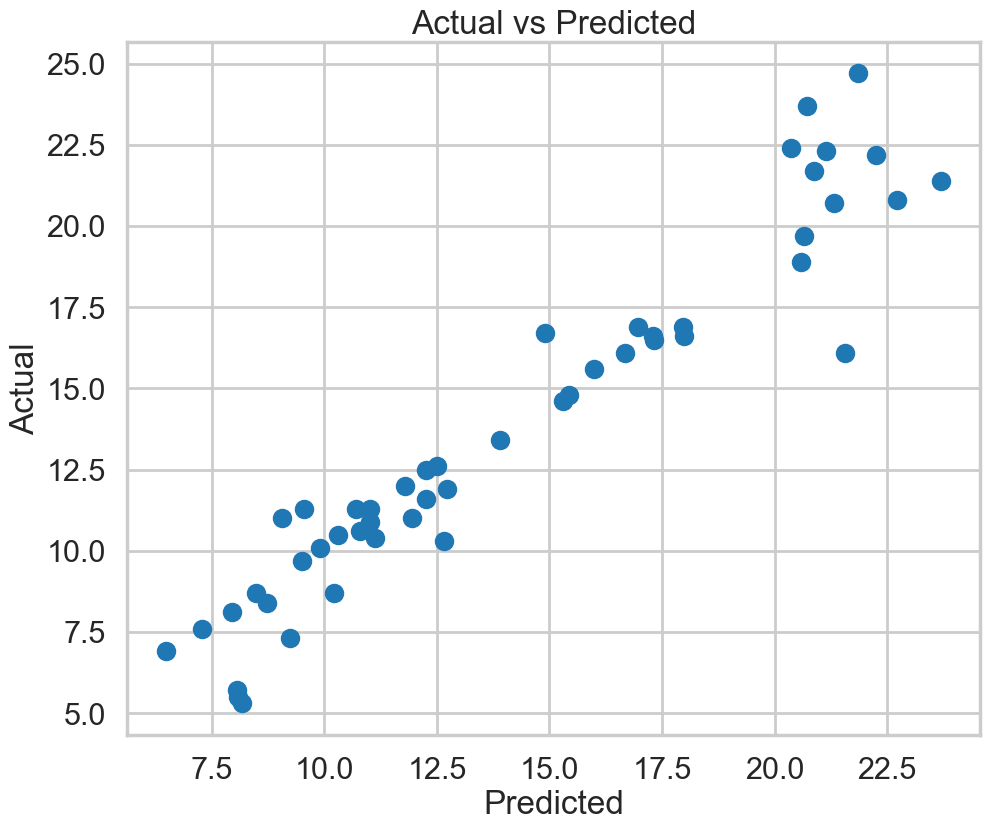

In [50]:
linreg_TVR_results = linreg_model(x_train[["TV", "Radio"]], x_test[["TV", "Radio"]])

cv_score = cross_val_score(LinearRegression(), x[["TV", "Radio"]], y, cv=10)

print("Cross-Val Results:", cv_score)
print("Cross-Val Mean:", cv_score.mean())

linreg_TVR_results.update({"Predictor/s":"TV & Radio", "Cross-Val Mean": cv_score.mean() * 100})

df_results = df_results.append(linreg_TVR_results, ignore_index=True)

# Conclusion

In [51]:
df_results.set_index("Predictor/s", inplace = True)
df_results.head()

,R2,MAE,MSE,RMSE,Cross-Val Mean
Predictor/s,,,,,
All,90.514836,1.119994,2.404067,1.550506,89.151734
TV,75.500940,1.865115,5.513351,2.348053,79.200442
TV,75.500940,1.865115,5.513351,2.348053,79.200442
TV & Radio,90.651321,1.114457,2.356396,1.535056,89.200324
